<a href="https://colab.research.google.com/github/JulianSilva2001/Image-Fitting/blob/main/Assignment2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

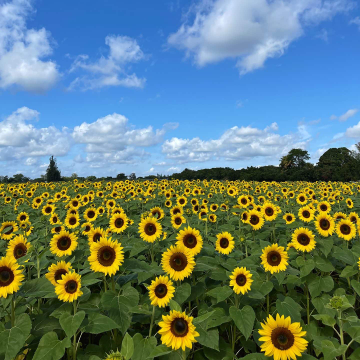

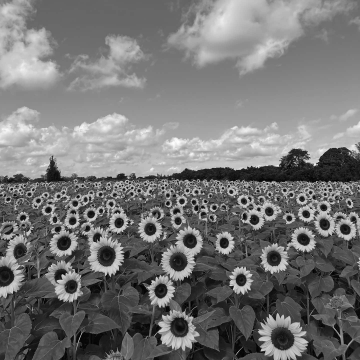

In [4]:
im = cv.imread("/content/drive/MyDrive/Image Fitting/the_berry_farms_sunflower_field.jpeg", cv.IMREAD_REDUCED_COLOR_4)
bgr_image = cv.cvtColor(im, cv.COLOR_BGR2RGB)
gray_image = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

cv2_imshow(im)
cv2_imshow(gray_image)




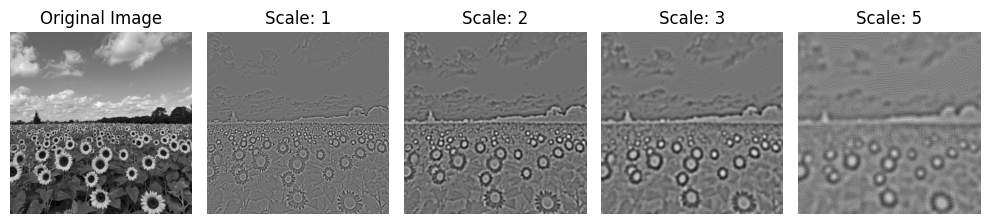

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian_at_scales(image, scales):
    laplacians = []

    for scale in scales:
        # Apply GaussianBlur to smooth the image at the given scale
        blurred_image = cv2.GaussianBlur(image, (0, 0), scale)

        # Apply Laplacian operator
        laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
        laplacians.append(laplacian)

    return laplacians

def plot_laplacians(image, laplacians, scales):
    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(1, len(scales) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot Laplacians at different scales
    for i, (laplacian, scale) in enumerate(zip(laplacians, scales)):
        plt.subplot(1, len(scales) + 1, i + 2)
        plt.imshow(laplacian, cmap='gray')
        plt.title(f'Scale: {scale}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()



# Define different scales (standard deviations for Gaussian blur)
scales = [1, 2, 3, 5]

# Compute Laplacians at different scales
laplacians = laplacian_at_scales(gray_image, scales)

# Plot the results
plot_laplacians(gray_image, laplacians, scales)


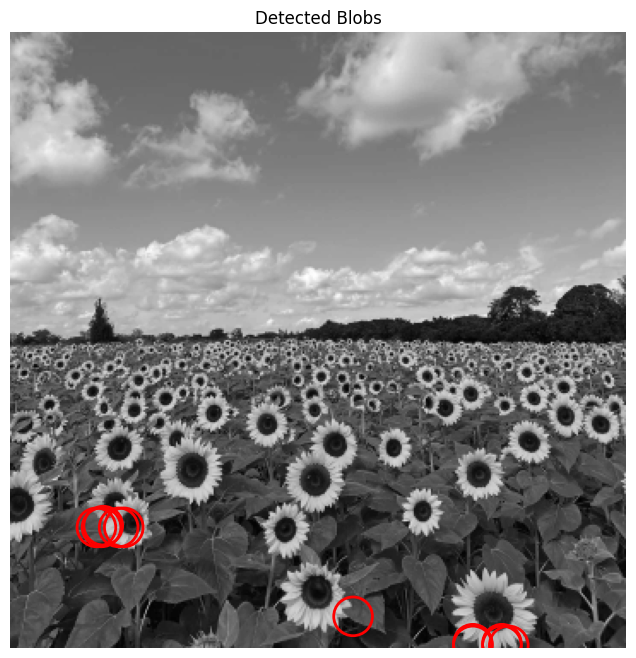

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace

def compute_laplacian_of_gaussian(image, scales):
    """Compute the Laplacian of Gaussian (LoG) for each scale."""
    log_images = []
    for scale in scales:
        # Apply Gaussian filter with standard deviation 'scale'
        log_image = gaussian_laplace(image, sigma=scale)

        # Normalize the result by multiplying by scale^2 (scale normalization)
        log_image = (scale ** 2) * log_image
        log_images.append(log_image)
    return np.stack(log_images, axis=-1)  # Stack them along a new dimension (scale dimension)

def detect_blobs(log_images, threshold):
    """Detect blobs by finding local maxima in both spatial and scale dimensions."""
    blobs = []
    h, w, num_scales = log_images.shape

    for z in range(1, num_scales):  # Iterate over scale levels
        for x in range(1, h - 1):  # Iterate over rows
            for y in range(1, w - 1):  # Iterate over columns
                # Get the 3x3x3 neighborhood around each point (in scale-space)
                neighborhood = log_images[x-1:x+2, y-1:y+2, z-1:z+2]

                # Find the maximum value in this neighborhood
                local_max = np.max(neighborhood)
                local_min = np.min(neighborhood)

                # Check if the current value is a local extremum
                if log_images[x, y, z] == local_max or log_images[x, y, z] == local_min:
                    if np.abs(log_images[x, y, z]) >= threshold:
                        # Save the blob with its coordinates (x, y) and scale (z)
                        blobs.append((x, y, z))

    return blobs

def plot_blobs(image, blobs, scales):
    """Plot the original image with detected blobs overlaid."""
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')

    for blob in blobs:
        y, x, scale_idx = blob
        sigma = scales[scale_idx]

        # The size of the blob corresponds to the scale
        circle = plt.Circle((x, y), sigma * np.sqrt(2), color='r', fill=False, linewidth=2)
        plt.gca().add_patch(circle)

    plt.title('Detected Blobs')
    plt.axis('off')
    plt.show()


# Define scales (standard deviations for Gaussian blur)
#scales = np.logspace(1, 6, num=1)  # Example scales from 1.4 to 100 (logarithmic scale)
scales = [7,8,9,10]
# Compute the Laplacian of Gaussian at different scales
log_images = compute_laplacian_of_gaussian(gray_image, scales)

# Detect blobs by looking for scale-space extrema
threshold = 0.9  # Set a threshold to filter out weak blobs
blobs = detect_blobs(log_images, threshold)

# Plot the original image with blobs detected
plot_blobs(gray_image, blobs, scales)
